In [1]:
import pandas as pd


In [2]:
df_headbrain=pd.read_csv("head_brain.csv")
df_headbrain


,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


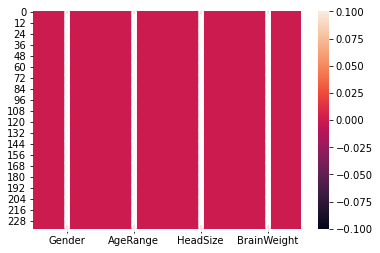

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_headbrain.isnull(),annot=True)
plt.show()

In [4]:
df_headbrain.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [5]:
from scipy.stats import zscore
z_score=abs(zscore(df_headbrain))
print(df_headbrain.shape)
df_headbrain_final=df_headbrain.loc[(z_score<3).all(axis=1)]
print(df_headbrain_final.shape)

(237, 4)
(236, 4)


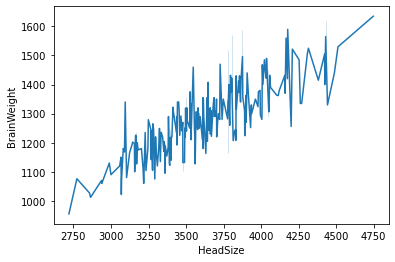

In [6]:
sns.lineplot(x=df_headbrain["HeadSize"],y=df_headbrain["BrainWeight"],data=df_headbrain)
plt.show()

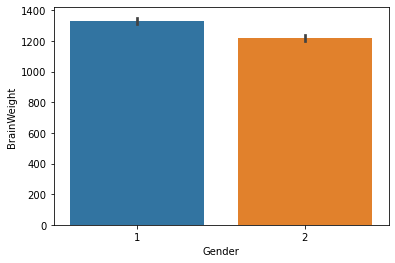

In [7]:
sns.barplot(x=df_headbrain["Gender"],y=df_headbrain["BrainWeight"],data=df_headbrain)
plt.show()

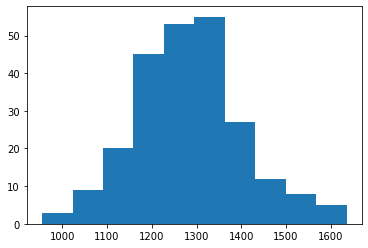

In [8]:
plt.hist(x="BrainWeight",bins=10,data=df_headbrain)
plt.show()

In [9]:
df_headbrain.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

In [10]:
x=df_headbrain[["HeadSize"]]
y=df_headbrain[["BrainWeight"]]

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182],
       [-0.52399669],
       [ 0.98496097],
       [ 0.01648451],
       [ 1.57482624],
       [ 0.54324791],
       [ 0.66396452],
       [-0.37584448],
       [-0.46089482],
       [-1.47875536],
       [ 2.16743507],
       [ 0.66945164],
       [ 1.13036962],
       [ 0.46642825],
       [ 0.20853367],
       [ 3.05360475],
       [ 2.16469151],
       [ 1.10293403],
       [ 1.06452419],
       [-0.49381754],
       [ 1.48428878],
       [ 0.41978774],
       [ 0.44447977],
       [ 1.28675251],
       [ 1.44587895],
       [ 1.43764827],
       [ 0.49386384],
       [-0.2935377 ],
       [ 0.31278892],
       [-0.82304466],
       [-0.38956228],
       [ 0.89991063],
       [-0.35389601],
       [ 1.8683871 ],
       [ 0.46642825],
       [ 0.62829825],
       [ 1

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(25,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is : ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
        

r2_score corresponding to random state:  25 is :  0.7759589177768255
r2_score corresponding to random state:  26 is :  0.7415732575349601
r2_score corresponding to random state:  27 is :  0.585589124768775
r2_score corresponding to random state:  28 is :  0.626338283839841
r2_score corresponding to random state:  29 is :  0.5965109967867821
r2_score corresponding to random state:  30 is :  0.7179874529859196
r2_score corresponding to random state:  31 is :  0.53998289163596
r2_score corresponding to random state:  32 is :  0.6477271724122664
r2_score corresponding to random state:  33 is :  0.7222399412879232
r2_score corresponding to random state:  34 is :  0.6873935214789475
r2_score corresponding to random state:  35 is :  0.5097121298800188
r2_score corresponding to random state:  36 is :  0.6506299144609536
r2_score corresponding to random state:  37 is :  0.6241285167480145
r2_score corresponding to random state:  38 is :  0.49945310577715973
r2_score corresponding to random stat

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.4936984443261273

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE IS: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.7759589177768255
RMSE IS:  60.68909982452854


In [19]:
import joblib
# save the model as a pickle in a file 
joblib.dump(lr,"lr_headbrain.pkl")

['lr_headbrain.pkl']